In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Satyam_Verma_project')

# Basic EDA

In [ ]:
import os
import pandas as pd

# Define the base directory of your dataset
data_dir = 'Denoising_Dataset_train_val'

# Initialize an empty list to store the data for the CSV file
csv_data = []

# Traverse the directory structure
for category in os.listdir(data_dir):  # First-level directory (e.g., 'transistor')
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):  # Check if it's a directory
        for split in os.listdir(category_path):  # Second-level directory (e.g., 'Val' or 'Train')
            split_path = os.path.join(category_path, split)
            if os.path.isdir(split_path):
                for defect_type in os.listdir(split_path):  # Third-level directory (e.g., 'Defect_mask')
                    defect_type_path = os.path.join(split_path, defect_type)
                    if os.path.isdir(defect_type_path):
                        for defect_category in os.listdir(defect_type_path):  # Fourth-level directory (e.g., 'bent_lead')
                            defect_category_path = os.path.join(defect_type_path, defect_category)
                            if os.path.isdir(defect_category_path):
                                for image in os.listdir(defect_category_path):  # Image files (e.g., '009_mask.png')
                                    image_path = os.path.join(defect_category_path, image)
                                    # Append the image path and other relevant details to the list
                                    csv_data.append([category, split, defect_type, defect_category, image_path])

# Convert the list into a pandas DataFrame
df = pd.DataFrame(csv_data, columns=['Category', 'Split', 'Defect_Type', 'Defect_Category', 'Image_Path'])

# Save the DataFrame to a CSV file
output_csv = 'image_paths.csv'
df.to_csv(output_csv, index=False)

print(f"CSV file saved at {output_csv}")


CSV file saved at image_paths.csv


# Read csv file

In [ ]:
data = pd.read_csv('image_paths.csv')
data.head()

,Category,Split,Defect_Type,Defect_Category,Image_Path
0,transistor,Val,Degraded_image,bent_lead,Denoising_Dataset_train_val/transistor/Val/Deg...
1,transistor,Val,Degraded_image,damaged_case,Denoising_Dataset_train_val/transistor/Val/Deg...
2,transistor,Val,Degraded_image,misplaced,Denoising_Dataset_train_val/transistor/Val/Deg...
3,transistor,Val,Degraded_image,cut_lead,Denoising_Dataset_train_val/transistor/Val/Deg...
4,transistor,Val,Defect_mask,misplaced,Denoising_Dataset_train_val/transistor/Val/Def...


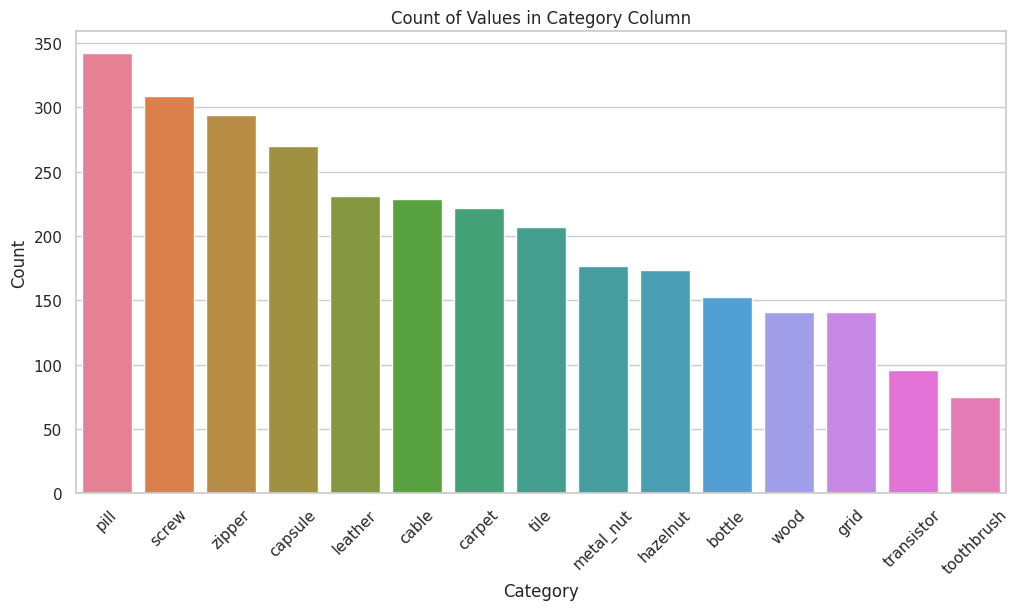

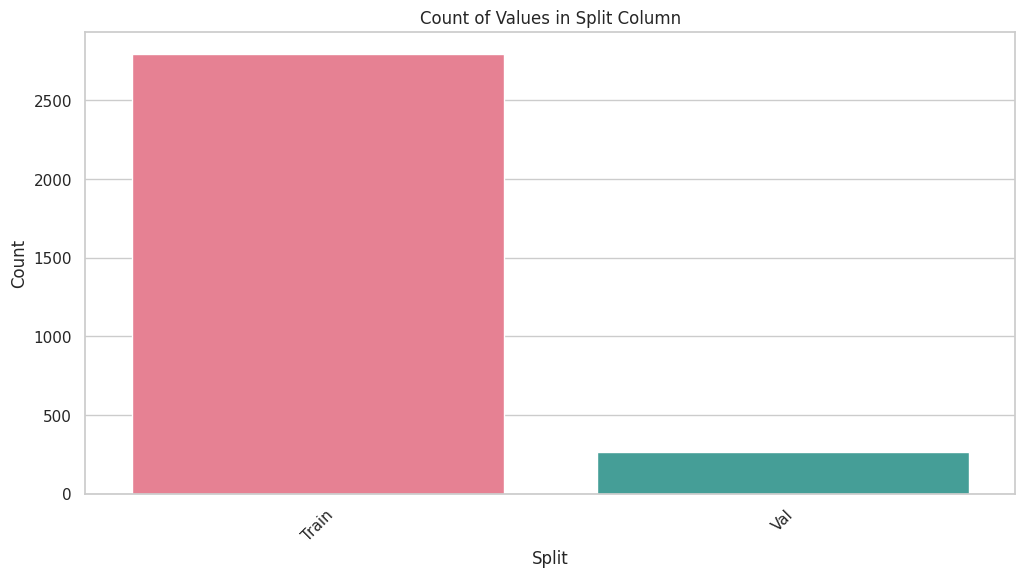

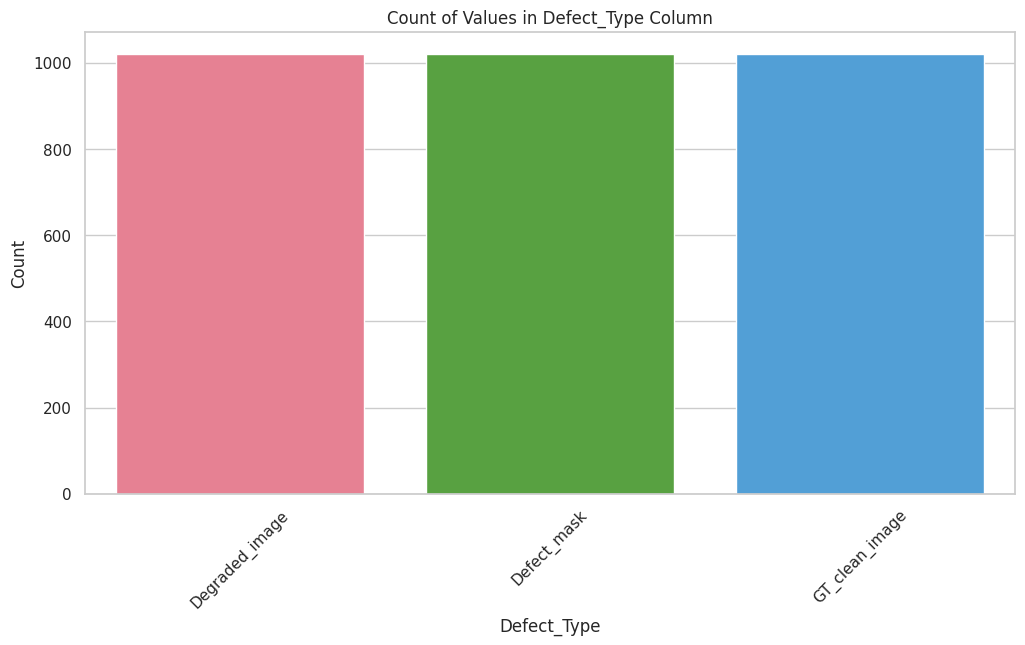

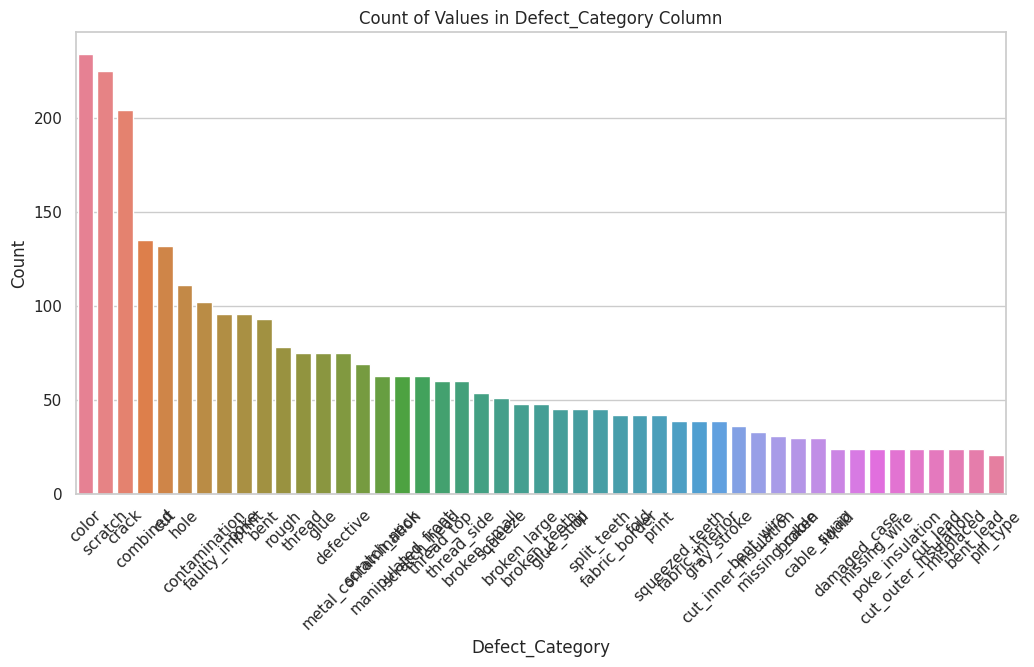

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the CSV file generated previously
csv_file = 'image_paths.csv'  # Update this to the path of your CSV file if needed
df = pd.read_csv(csv_file)

# Set the style for the seaborn plots
sns.set(style="whitegrid")

# Iterate through each column in the dataframe
for column in df.columns:
  if column!='Image_Path':
    plt.figure(figsize=(12, 6))

    # Generate a color palette with the number of unique values in the column
    unique_values = df[column].unique()
    palette = sns.color_palette("husl", len(unique_values))  # "husl" color palette for variety

    # Generate a count plot for the current column
    sns.countplot(data=df, x=column, palette=palette, order=df[column].value_counts().index)

    # Set plot title and labels
    plt.title(f'Count of Values in {column} Column')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()


# Name change of mask image

In [ ]:
data_dir = 'Denoising_Dataset_train_val'
for category in os.listdir(data_dir):  # First-level directory (e.g., 'transistor')
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue  # Skip if it's not a directory

    for sub_cat in os.listdir(category_path):  # Second-level directory (e.g., 'Train' or 'Val')
        category_split = os.path.join(category_path, sub_cat)
        for sub_category in os.listdir(category_split):
          sub_category_path = os.path.join(category_split, sub_category)
          if sub_category == 'Defect_mask':
            for image in os.listdir(sub_category_path):
              outter_image_path = os.path.join(sub_category_path, image)
              for image_path in os.listdir(outter_image_path):
                change_image_path = image_path.split('_')[0] + ".png"
                image_path = os.path.join(outter_image_path, image_path)
                change_image_path = os.path.join(outter_image_path, change_image_path)
                os.rename(image_path, change_image_path)

# Generate csv file

In [ ]:
GT_clean_image = []
Degraded_image = []
Defect_mask = []
for category in os.listdir(data_dir):  # First-level directory (e.g., 'transistor')
    category_path = os.path.join(data_dir, category)
    if not os.path.isdir(category_path):
        continue  # Skip if it's not a directory

    for sub_cat in os.listdir(category_path):  # Second-level directory (e.g., 'Train' or 'Val')
        category_split = os.path.join(category_path, sub_cat)
        for sub_category in os.listdir(category_split):
          sub_category_path = os.path.join(category_split, sub_category)
          if sub_category == 'Defect_mask':
            for image in os.listdir(sub_category_path):
              outter_image_path = os.path.join(sub_category_path, image)
              for image_path in os.listdir(outter_image_path):
                  image_path = os.path.join(outter_image_path, image_path)
                  Defect_mask.append(image_path)
          elif sub_category == 'GT_clean_image':
            for image in os.listdir(sub_category_path):
              outter_image_path = os.path.join(sub_category_path, image)
              for image_path in os.listdir(outter_image_path):
                  image_path = os.path.join(outter_image_path, image_path)
                  GT_clean_image.append(image_path)
          else:
            pass
GT_clean_image = sorted(GT_clean_image)
Defect_mask = sorted(Defect_mask)
data = pd.DataFrame(columns=['GT_clean_image', 'Defect_mask'])
data['GT_clean_image'] = GT_clean_image
data['Defect_mask'] = Defect_mask
data.to_csv('image_paths_with_degraded.csv', index=False)

# Add Degraded images on csv file

In [ ]:
import pandas as pd
data = pd.read_csv('image_paths_with_degraded.csv')
data.head()

,GT_clean_image,Defect_mask
0,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...
1,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...
2,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...
3,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...
4,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...


In [ ]:
Degraded_image = []
for i in range(data.shape[0]):
  split_value = data.iloc[i,0].split('/')
  values = split_value[0] + '/' + split_value[1] + '/' + split_value[2] + '/' + 'Degraded_image' + '/' + split_value[4] + '/' + split_value[5]
  Degraded_image.append(values)
data['Degraded_image'] = Degraded_image
data.to_csv('image_paths_with_degraded.csv', index=False)

In [ ]:
import pandas as pd
data = pd.read_csv('image_paths_with_degraded.csv')
data.head()

,GT_clean_image,Defect_mask,Degraded_image
0,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...,Denoising_Dataset_train_val/bottle/Train/Degra...
1,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...,Denoising_Dataset_train_val/bottle/Train/Degra...
2,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...,Denoising_Dataset_train_val/bottle/Train/Degra...
3,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...,Denoising_Dataset_train_val/bottle/Train/Degra...
4,Denoising_Dataset_train_val/bottle/Train/GT_cl...,Denoising_Dataset_train_val/bottle/Train/Defec...,Denoising_Dataset_train_val/bottle/Train/Degra...


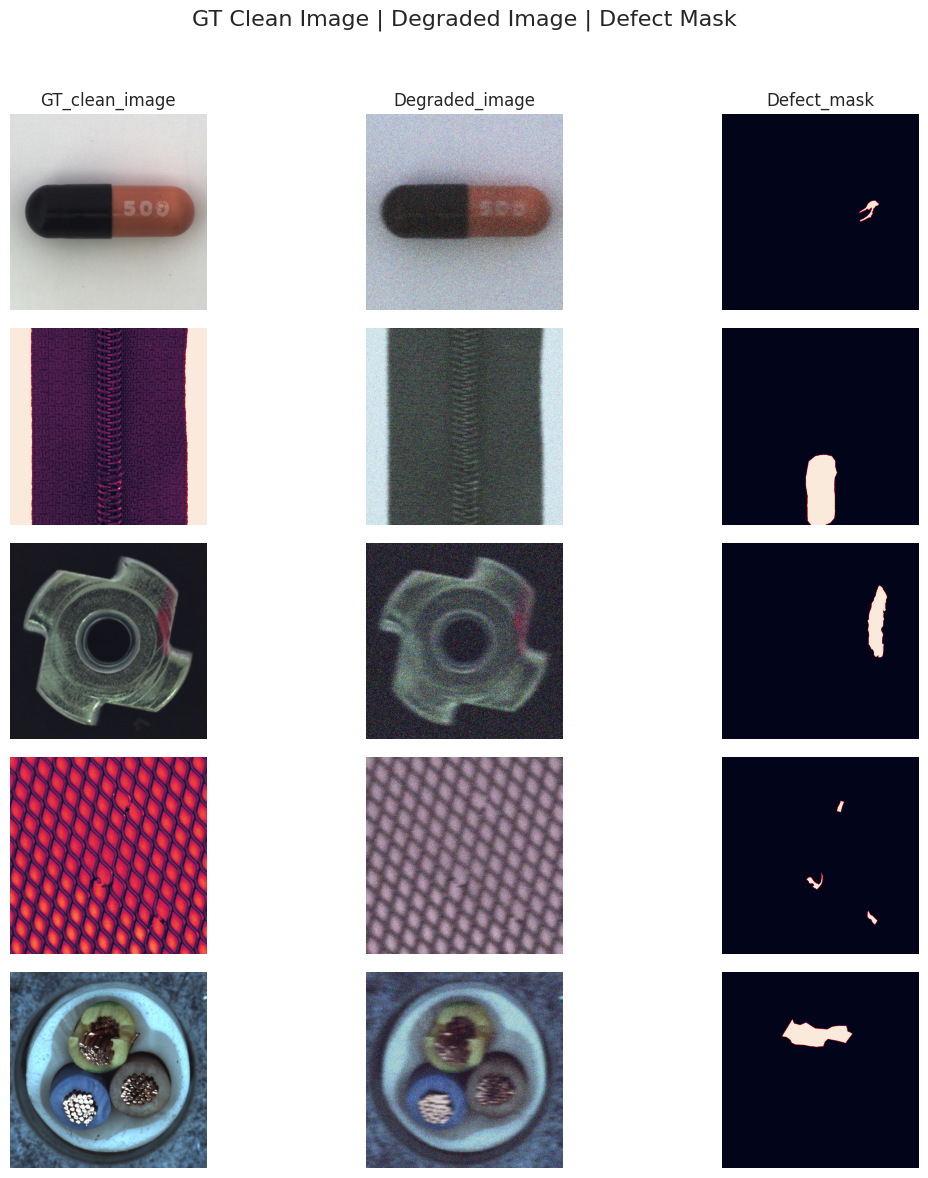

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Display 5 images from each category in columns
def display_random_images_from_csv(dataframe, num_images=5):
    # Randomly select rows without replacement
    random_indices = random.sample(range(len(dataframe)), num_images)
    random_df = dataframe.iloc[random_indices]

    fig, axs = plt.subplots(num_images, 3, figsize=(12, 12))
    fig.suptitle("GT Clean Image | Degraded Image | Defect Mask", fontsize=16)

    # Titles for each column
    column_titles = ["GT_clean_image", "Degraded_image", "Defect_mask"]

    for i, index in enumerate(random_df.index):
        for j, title in enumerate(column_titles):
            # Load image from path and display
            image_path = random_df[title].iloc[i]
            img = mpimg.imread(image_path)
            axs[i, j].imshow(img)
            axs[i, j].axis("off")  # Hide axes for clarity
            if i == 0:
                axs[i, j].set_title(title, fontsize=12)  # Set column title

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Display the images from the CSV file
display_random_images_from_csv(data)
